In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import os

In [15]:
sns.set_palette("deep")

In [16]:
os.makedirs('plots', exist_ok=True)

In [17]:
df = pd.read_csv('data.csv')

In [18]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year
df['Month'] = df['Date Local'].dt.month
df['State_County_City'] = df['State'] + '_' + df['County'] + '_' + df['City']

In [19]:
for col in ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'NO2 1st Max Value', 'O3 1st Max Value', 'SO2 1st Max Value', 'CO 1st Max Value']:
    df[col] = df[col].clip(lower=0)

In [20]:
df['SO2 AQI'] = df['SO2 AQI'].fillna(df['SO2 AQI'].median())
df['CO AQI'] = df['CO AQI'].fillna(df['CO AQI'].median())

### Yearly Mean NO2 AQI

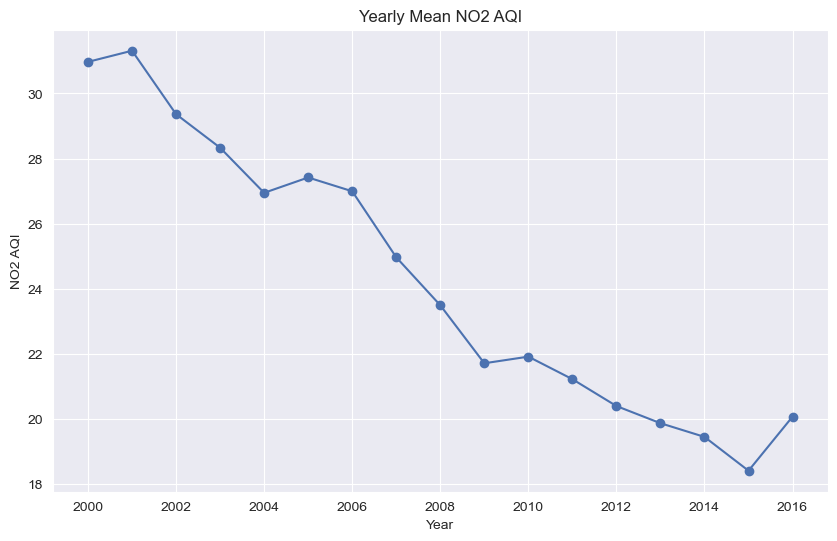

In [21]:
plt.figure(figsize=(10, 6))
yearly_no2 = df.groupby('Year')['NO2 AQI'].mean()
plt.plot(yearly_no2.index, yearly_no2.values, marker='o')
plt.title('Yearly Mean NO2 AQI')
plt.xlabel('Year')
plt.ylabel('NO2 AQI')
plt.grid(True)
plt.savefig('plots/yearly_no2_aqi.png')
plt.show()
plt.close()

### Monthly Mean O3 AQI

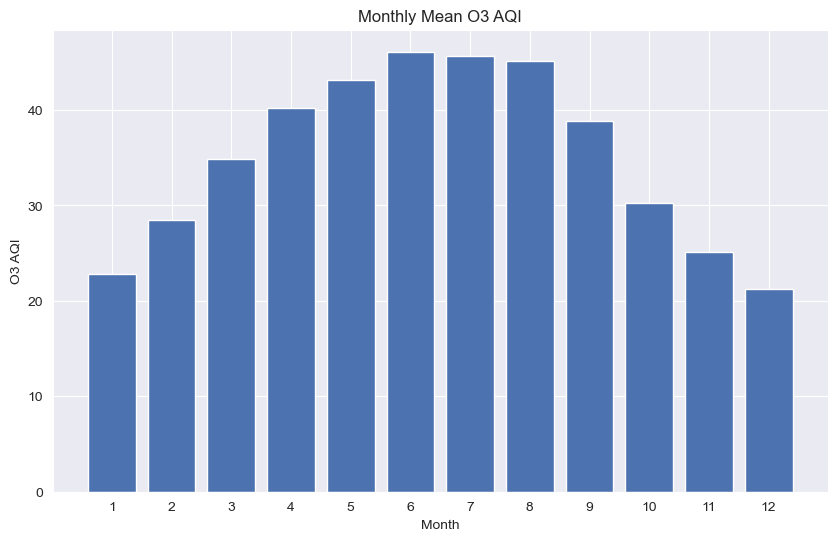

In [22]:
plt.figure(figsize=(10, 6))
monthly_o3 = df.groupby('Month')['O3 AQI'].mean()
plt.bar(monthly_o3.index, monthly_o3.values)
plt.title('Monthly Mean O3 AQI')
plt.xlabel('Month')
plt.ylabel('O3 AQI')
plt.xticks(range(1, 13))
plt.savefig('plots/monthly_o3_aqi.png')
plt.show()
plt.close()

### Hourly NO2 Max Value Distribution

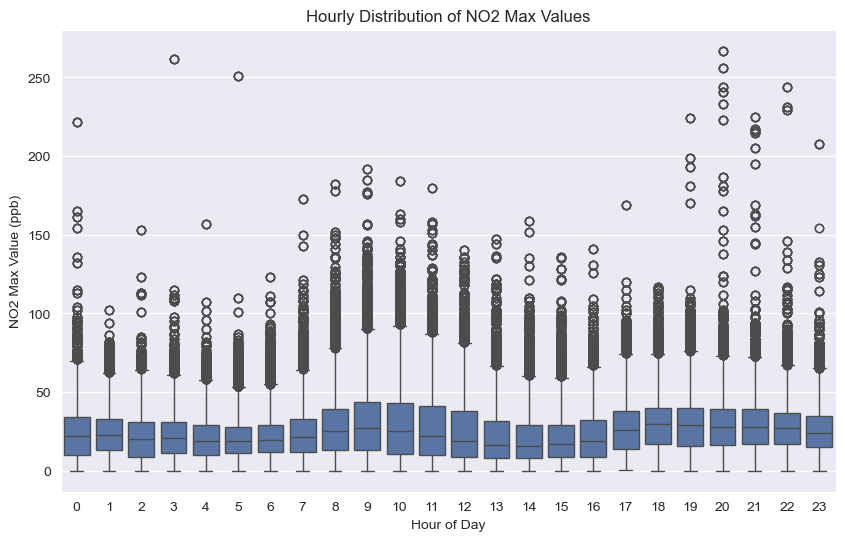

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NO2 1st Max Hour', y='NO2 1st Max Value', data=df)
plt.title('Hourly Distribution of NO2 Max Values')
plt.xlabel('Hour of Day')
plt.ylabel('NO2 Max Value (ppb)')
plt.savefig('plots/hourly_no2_max.png')
plt.show()
plt.close()

### Yearly SO2 AQI Trend

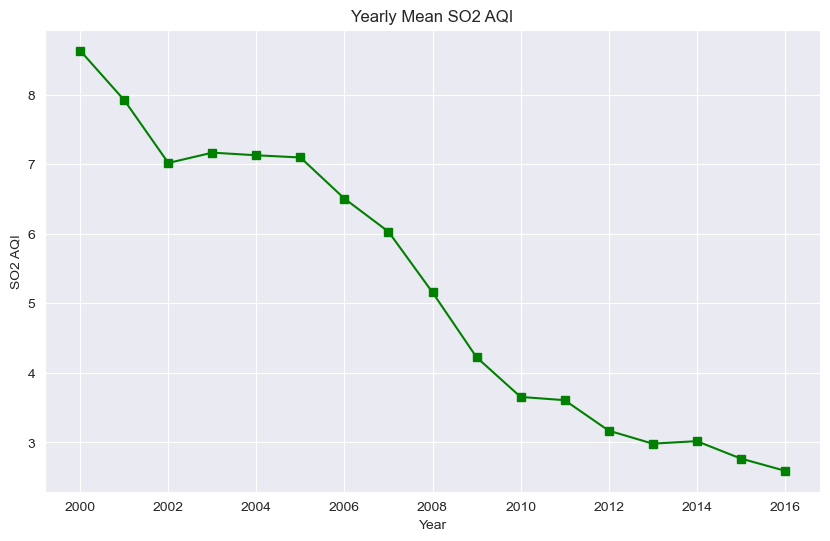

In [24]:
plt.figure(figsize=(10, 6))
yearly_so2 = df.groupby('Year')['SO2 AQI'].mean()
plt.plot(yearly_so2.index, yearly_so2.values, marker='s', color='green')
plt.title('Yearly Mean SO2 AQI')
plt.xlabel('Year')
plt.ylabel('SO2 AQI')
plt.grid(True)
plt.savefig('plots/yearly_so2_aqi.png')
plt.show()
plt.close()

### Monthly CO AQI

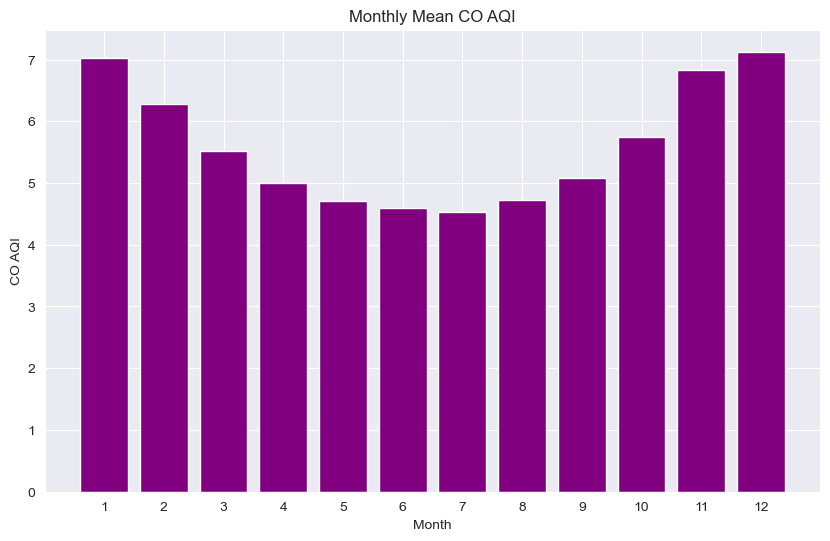

In [27]:
plt.figure(figsize=(10, 6))
monthly_co = df.groupby('Month')['CO AQI'].mean()
plt.bar(monthly_co.index, monthly_co.values, color='purple')
plt.title('Monthly Mean CO AQI')
plt.xlabel('Month')
plt.ylabel('CO AQI')
plt.xticks(range(1, 13))
plt.savefig('plots/monthly_co_aqi.png')
plt.show()
plt.close()

### Yearly Mean Pollutant Concentrations

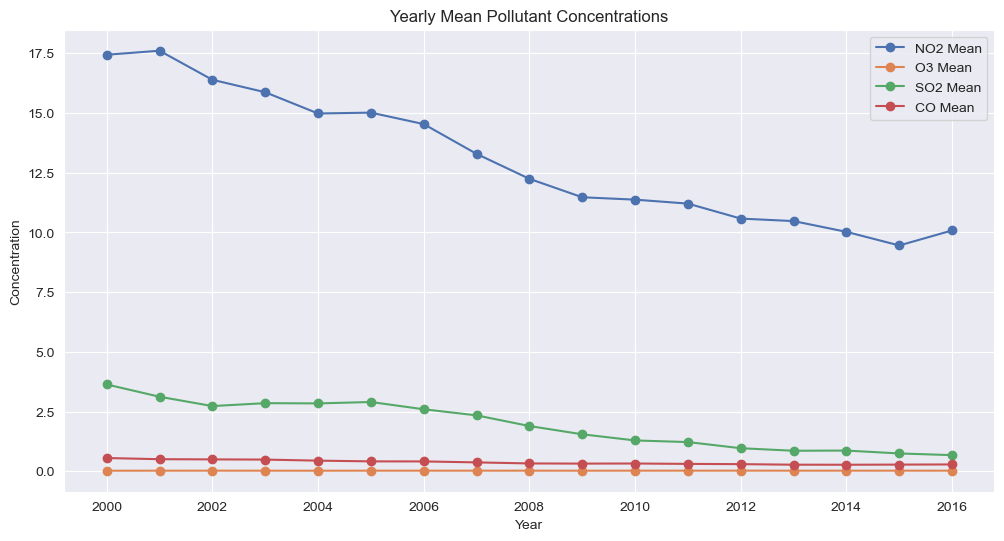

In [28]:
plt.figure(figsize=(12, 6))
for pollutant in ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']:
    yearly_mean = df.groupby('Year')[pollutant].mean()
    plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label=pollutant)
plt.title('Yearly Mean Pollutant Concentrations')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.savefig('plots/yearly_pollutant_means.png')
plt.show()
plt.close()

### Hourly O3 Max Value Distribution

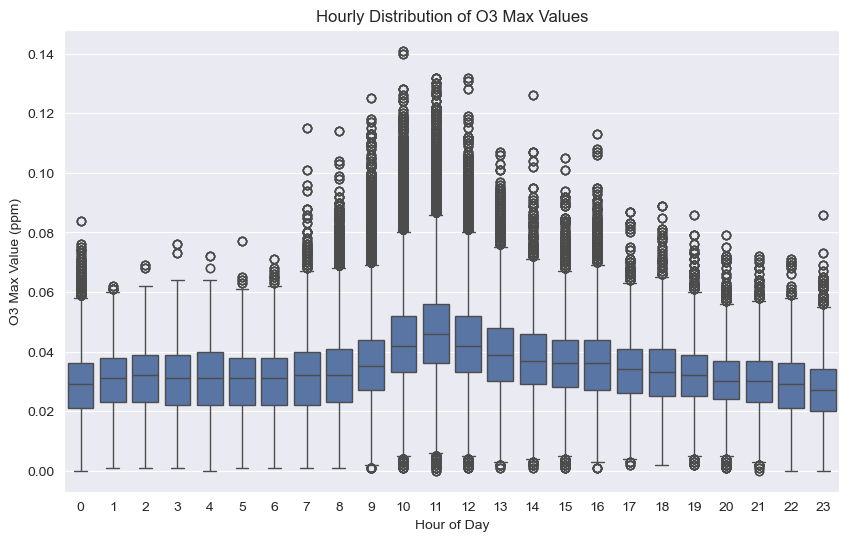

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='O3 1st Max Hour', y='O3 1st Max Value', data=df)
plt.title('Hourly Distribution of O3 Max Values')
plt.xlabel('Hour of Day')
plt.ylabel('O3 Max Value (ppm)')
plt.savefig('plots/hourly_o3_max.png')
plt.show()
plt.close()

### Monthly NO2 AQI Violin Plot

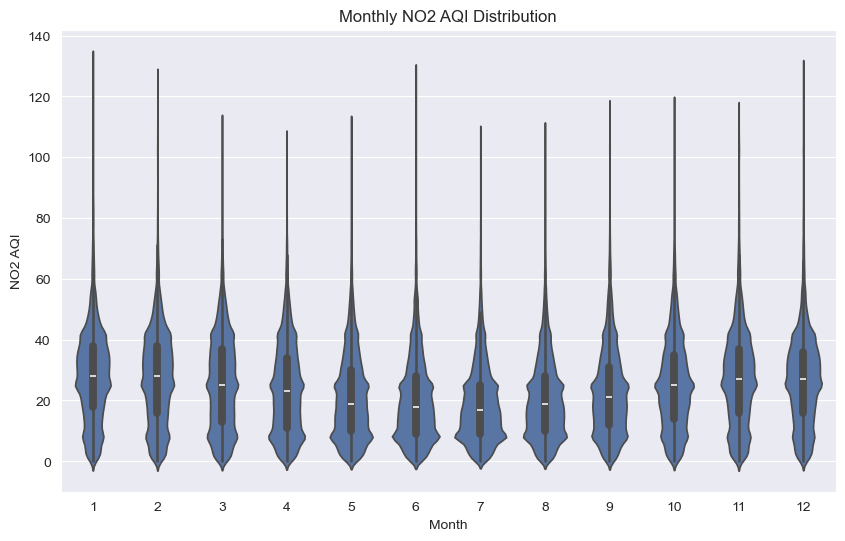

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='NO2 AQI', data=df)
plt.title('Monthly NO2 AQI Distribution')
plt.xlabel('Month')
plt.ylabel('NO2 AQI')
plt.savefig('plots/monthly_no2_aqi_violin.png')
plt.show()
plt.close()

### Top 10 States by NO2 AQI

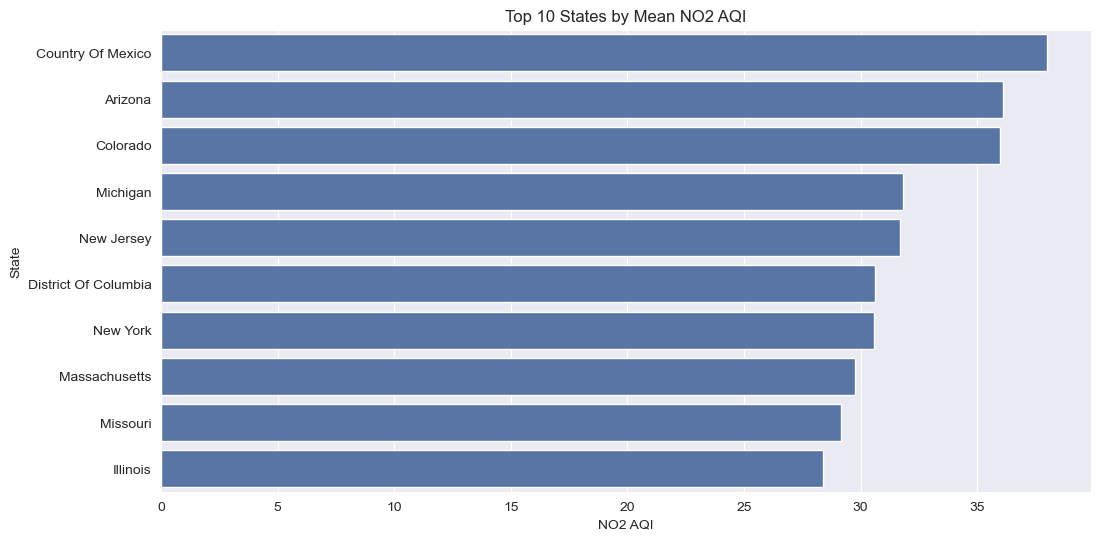

In [32]:
plt.figure(figsize=(12, 6))
top_states_no2 = df.groupby('State')['NO2 AQI'].mean().nlargest(10)
sns.barplot(x=top_states_no2.values, y=top_states_no2.index)
plt.title('Top 10 States by Mean NO2 AQI')
plt.xlabel('NO2 AQI')
plt.ylabel('State')
plt.savefig('plots/top_states_no2_aqi.png')
plt.show()
plt.close()

### Top 10 Cities by O3 AQI

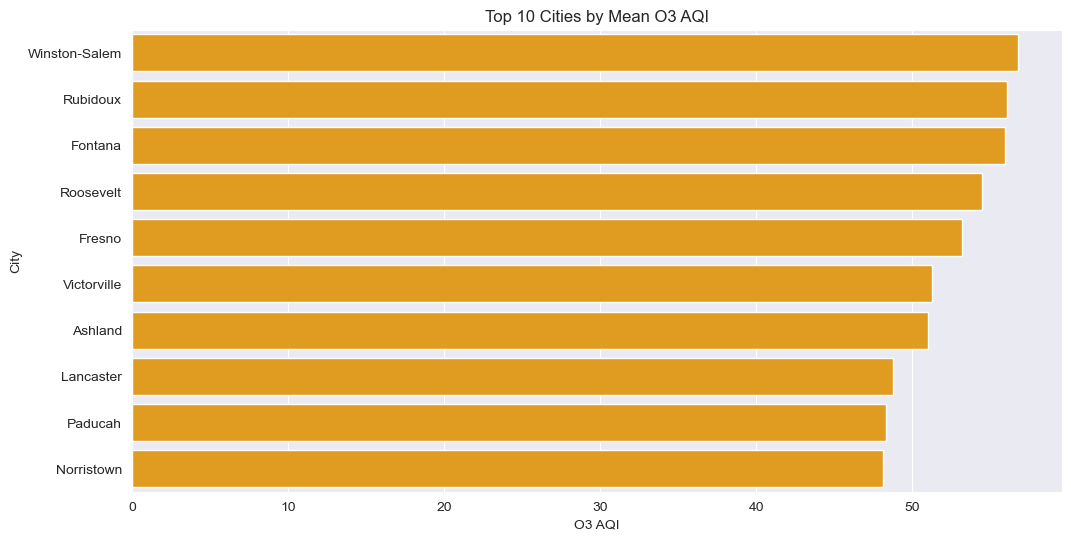

In [34]:
plt.figure(figsize=(12, 6))
top_cities_o3 = df.groupby('City')['O3 AQI'].mean().nlargest(10)
sns.barplot(x=top_cities_o3.values, y=top_cities_o3.index, color='orange')
plt.title('Top 10 Cities by Mean O3 AQI')
plt.xlabel('O3 AQI')
plt.ylabel('City')
plt.savefig('plots/top_cities_o3_aqi.png')
plt.show()
plt.close()

### SO2 AQI by State (Boxplot)

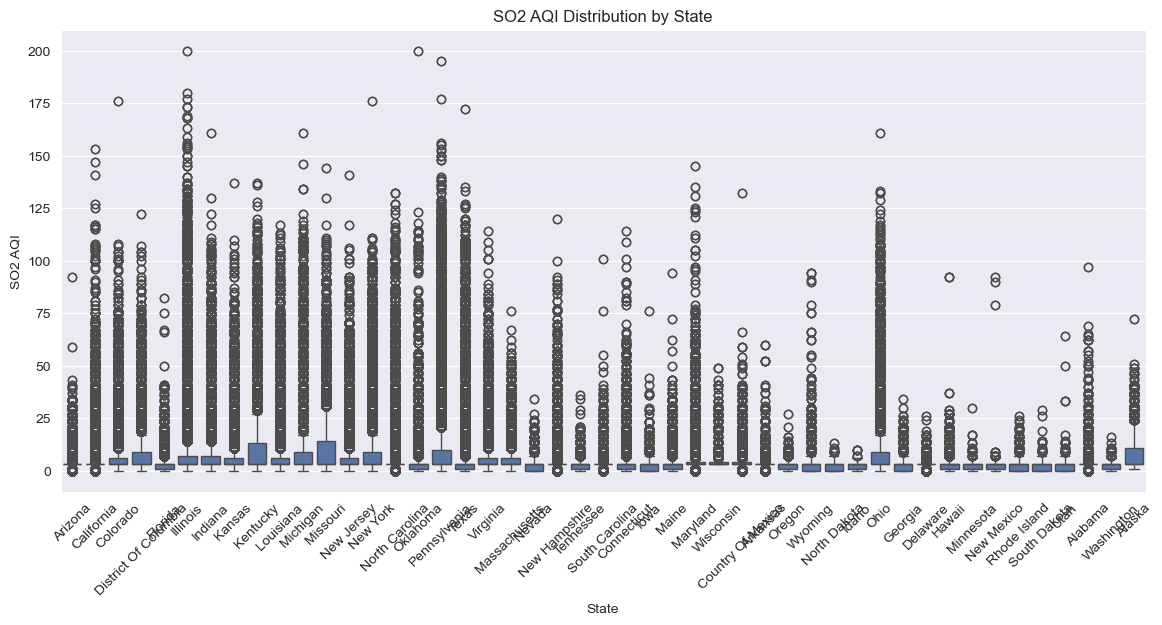

In [35]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='State', y='SO2 AQI', data=df)
plt.title('SO2 AQI Distribution by State')
plt.xlabel('State')
plt.ylabel('SO2 AQI')
plt.xticks(rotation=45)
plt.savefig('plots/so2_aqi_by_state.png')
plt.show()
plt.close()

### CO AQI by Top 10 Counties

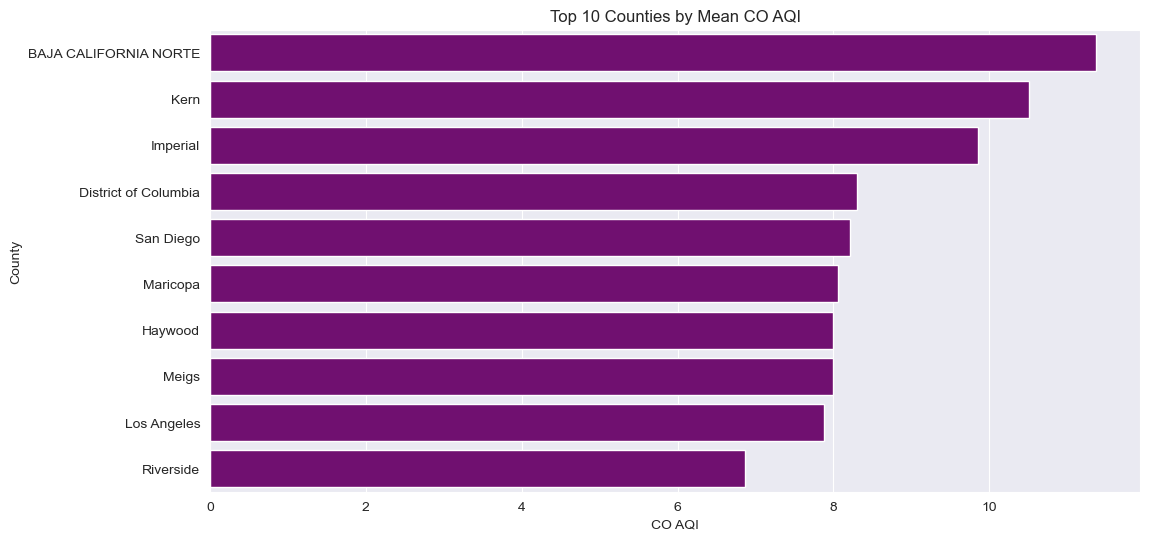

In [36]:
plt.figure(figsize=(12, 6))
top_counties_co = df.groupby('County')['CO AQI'].mean().nlargest(10)
sns.barplot(x=top_counties_co.values, y=top_counties_co.index, color='purple')
plt.title('Top 10 Counties by Mean CO AQI')
plt.xlabel('CO AQI')
plt.ylabel('County')
plt.savefig('plots/top_counties_co_aqi.png')
plt.show()
plt.close()

### NO2 Mean by City (Top 10)

In [37]:
plt.figure(figsize=(12, 6))
top_cities_no2 = df.groupby('City')['NO2 Mean'].mean().nlargest(10)
sns.barplot(x=top_cities_no2.values, y=top_cities_no2.index)
plt.title('Top 10 Cities by Mean NO2 Concentration')
plt.xlabel('NO2 Mean (ppb)')
plt.ylabel('City')
plt.savefig('plots/top_cities_no2_mean.png')
plt.close()

### O3 Mean by State

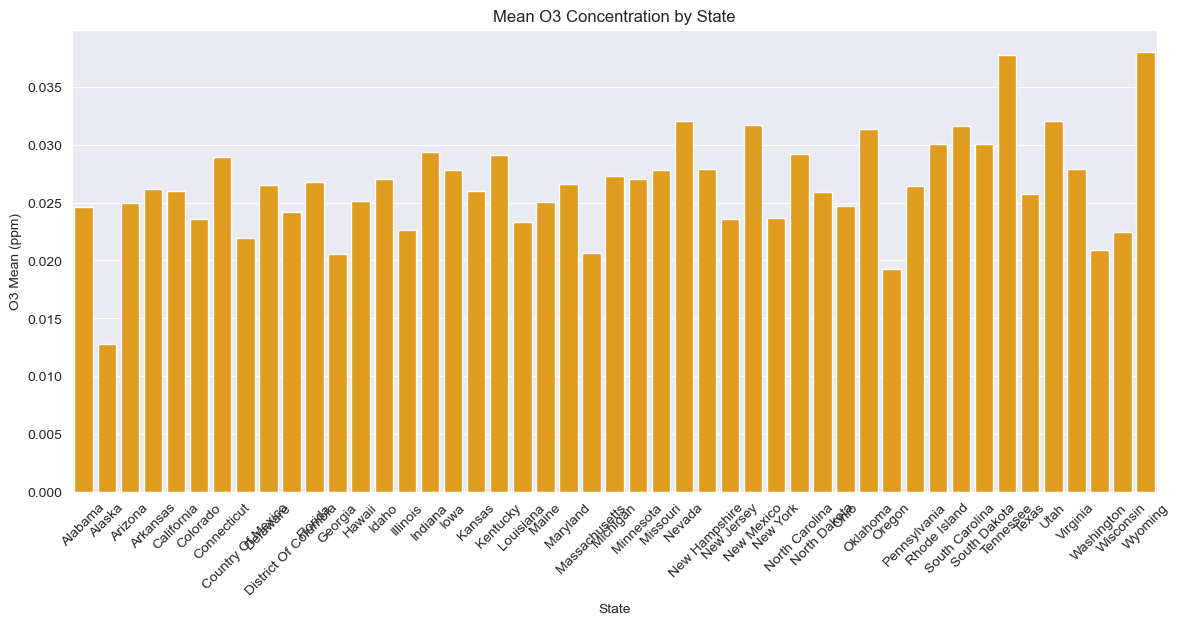

In [39]:
plt.figure(figsize=(14, 6))
state_o3 = df.groupby('State')['O3 Mean'].mean()
sns.barplot(x=state_o3.index, y=state_o3.values, color='orange')
plt.title('Mean O3 Concentration by State')
plt.xlabel('State')
plt.ylabel('O3 Mean (ppm)')
plt.xticks(rotation=45)
plt.savefig('plots/o3_mean_by_state.png')
plt.show()
plt.close()

### SO2 Max Value by Top 10 Sites

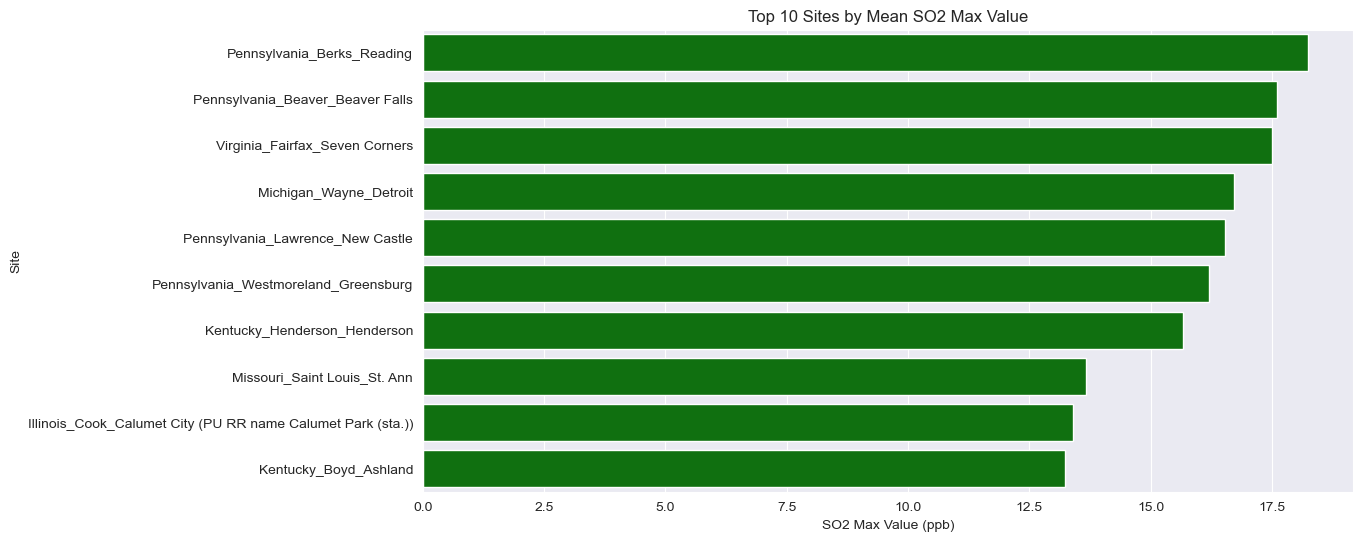

In [40]:
plt.figure(figsize=(12, 6))
top_sites_so2 = df.groupby('State_County_City')['SO2 1st Max Value'].mean().nlargest(10)
sns.barplot(x=top_sites_so2.values, y=top_sites_so2.index, color='green')
plt.title('Top 10 Sites by Mean SO2 Max Value')
plt.xlabel('SO2 Max Value (ppb)')
plt.ylabel('Site')
plt.savefig('plots/top_sites_so2_max.png')
plt.show()
plt.close()

### CO Mean by City (Top 10)

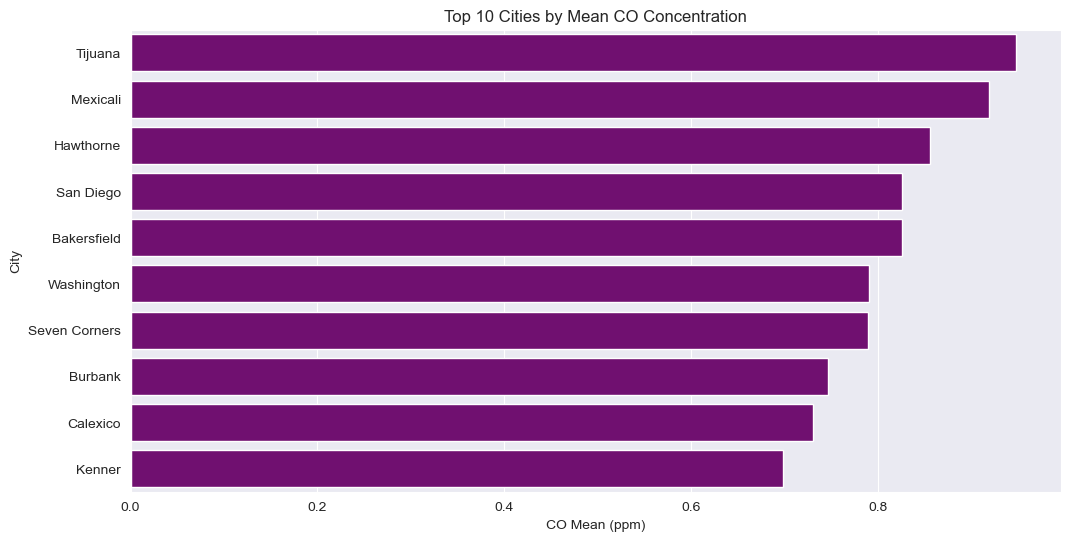

In [42]:
plt.figure(figsize=(12, 6))
top_cities_co = df.groupby('City')['CO Mean'].mean().nlargest(10)
sns.barplot(x=top_cities_co.values, y=top_cities_co.index, color='purple')
plt.title('Top 10 Cities by Mean CO Concentration')
plt.xlabel('CO Mean (ppm)')
plt.ylabel('City')
plt.savefig('plots/top_cities_co_mean.png')
plt.show()
plt.close()

### NO2 vs O3 Scatter

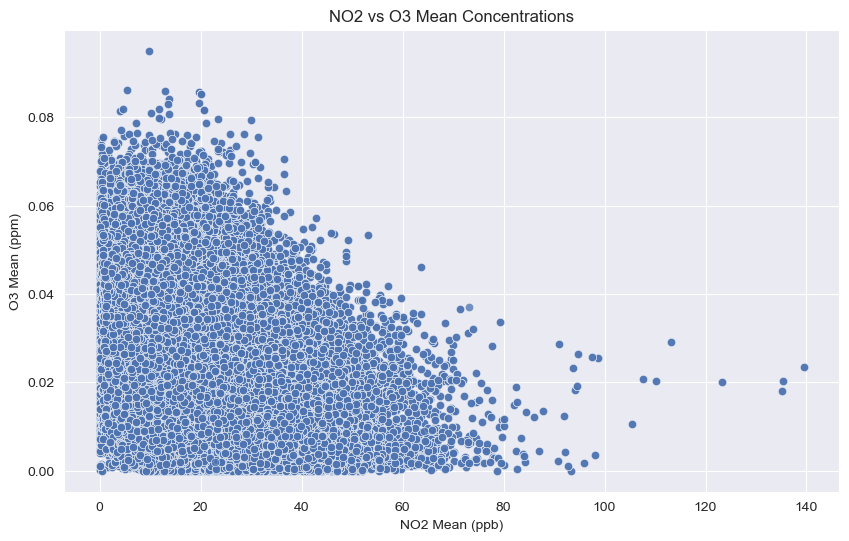

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2 Mean', y='O3 Mean', data=df, alpha=0.5)
plt.title('NO2 vs O3 Mean Concentrations')
plt.xlabel('NO2 Mean (ppb)')
plt.ylabel('O3 Mean (ppm)')
plt.savefig('plots/no2_vs_o3.png')
plt.show()
plt.close()

### Correlation Heatmap

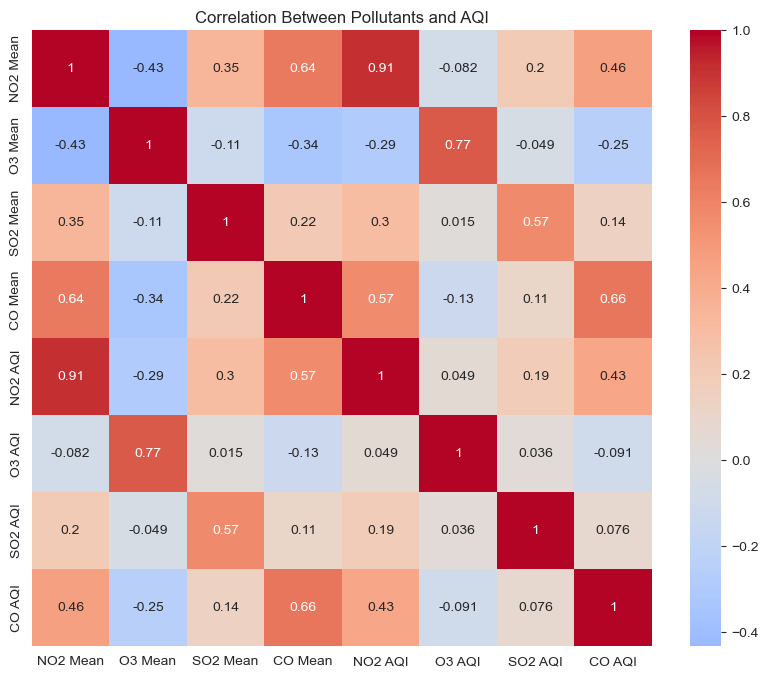

In [44]:
plt.figure(figsize=(10, 8))
corr = df[['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Pollutants and AQI')
plt.savefig('plots/correlation_heatmap.png')
plt.show()
plt.close()

### NO2 AQI vs CO AQI

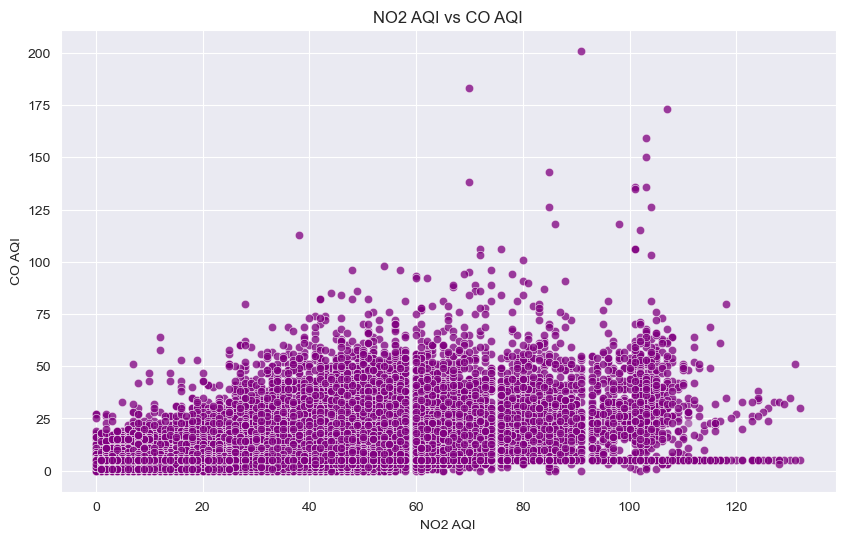

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2 AQI', y='CO AQI', data=df, alpha=0.5, color='purple')
plt.title('NO2 AQI vs CO AQI')
plt.xlabel('NO2 AQI')
plt.ylabel('CO AQI')
plt.savefig('plots/no2_vs_co_aqi.png')
plt.show()
plt.close()

### SO2 vs O3 Max Values

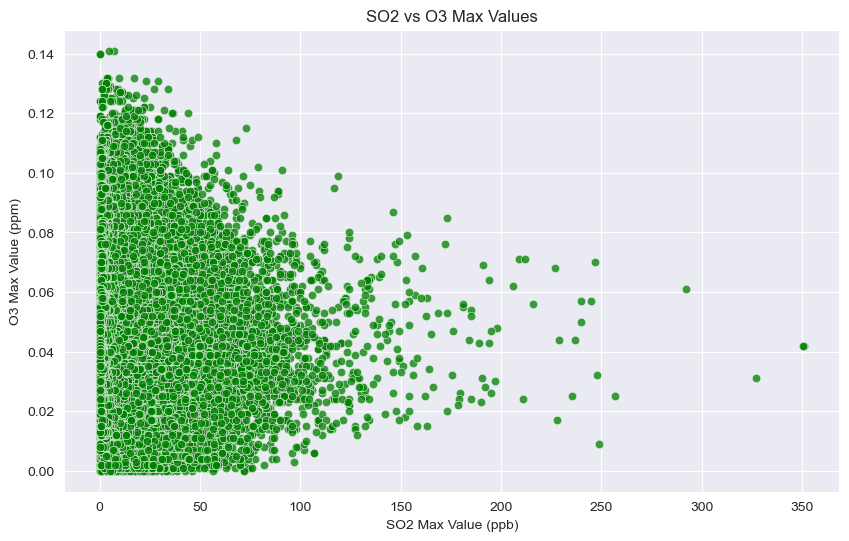

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SO2 1st Max Value', y='O3 1st Max Value', data=df, alpha=0.5, color='green')
plt.title('SO2 vs O3 Max Values')
plt.xlabel('SO2 Max Value (ppb)')
plt.ylabel('O3 Max Value (ppm)')
plt.savefig('plots/so2_vs_o3_max.png')
plt.show()
plt.close()